In [2]:
# Chapter 4.4

Data set available for download at: https://figshare.com/articles/Mammals_Dataset/1565651

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [10]:
mammals = pd.read_csv('../data/mammals.csv')

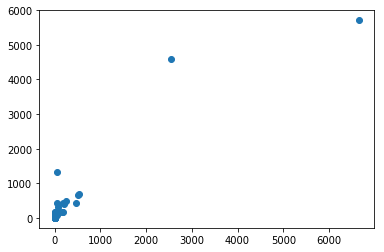

In [124]:
plt.scatter(mammals['body'],mammals['brain'])
plt.show()

In [14]:
body_data = mammals['body']
body_data.shape

(62,)

In [15]:
brain_data = mammals['brain']
brain_data.shape

(62,)

In [ ]:
# Regression with statsmodels

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
body_data = sm.add_constant(body_data)

In [24]:
regression1 = sm.OLS(brain_data, body_data).fit()

In [25]:
regression2 = smf.ols(formula='brain~body',data=mammals).fit()

In [26]:
print(regression1.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           1.54e-28
Time:                        10:29:18   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0044     43.553      2.090      0.0

In [27]:
print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           1.54e-28
Time:                        10:29:20   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.0044     43.553      2.090      0.0

In [28]:
regression2.params

Intercept    91.004396
body          0.966496
dtype: float64

In [29]:
new_body = np.linspace(0,7000,10)

In [30]:
brain_pred = regression2.predict(exog=dict(body=new_body))

In [31]:
print(brain_pred)

0      91.004396
1     842.723793
2    1594.443190
3    2346.162587
4    3097.881985
5    3849.601382
6    4601.320779
7    5353.040176
8    6104.759573
9    6856.478970
dtype: float64


In [32]:
# Regression with Scikit-Learn

In [34]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


In [3]:
mammals = pd.read_csv('../data/mammals.csv')

In [71]:
body_data = mammals[['body']]

In [72]:
brain_data = mammals[['brain']]

In [73]:
sk_regr= linear_model.LinearRegression()

In [74]:
sk_regr.fit(body_data, brain_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
print(sk_regr.coef_)

[[ 0.96649637]]


In [76]:
print(sk_regr.intercept_)

[ 91.00439621]


In [77]:
print(sk_regr.score(body_data,brain_data))

0.872662084304


In [78]:
new_body = np.linspace(0,7000,10)
new_body = new_body[:,np.newaxis]

In [79]:
brain_pred = sk_regr.predict(new_body)

In [80]:
print(brain_pred)

[[   91.00439621]
 [  842.72379329]
 [ 1594.44319036]
 [ 2346.16258744]
 [ 3097.88198452]
 [ 3849.6013816 ]
 [ 4601.32077868]
 [ 5353.04017576]
 [ 6104.75957284]
 [ 6856.47896992]]


In [82]:
#  Logarithmic Tranformation

In [83]:
mammals['log_body'] = log(mammals['body'])

In [84]:
mammals['log_brain'] = log(mammals['brain'])

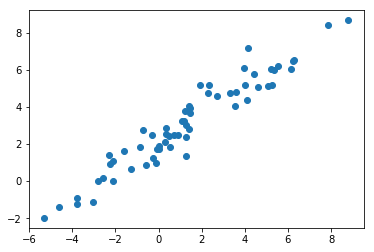

In [123]:
plt.scatter(mammals['log_body'],mammals['log_brain'])
plt.show()

In [86]:
log_lm = smf.ols(formula = 'log_brain~log_body', data = mammals).fit()

In [87]:
print(log_lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_brain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           9.84e-35
Time:                        14:26:40   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1348      0.096     22.227      0.0

In [107]:
log_lm.params

Intercept    2.134789
log_body     0.751686
dtype: float64

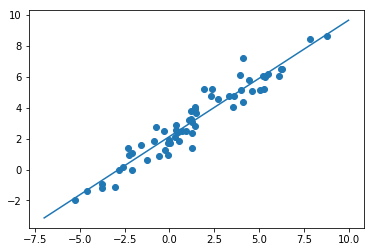

In [120]:
plt.scatter(mammals['log_body'],mammals['log_brain'])
X_plot = np.linspace(-7,10,50)
plt.plot(X_plot, X_plot*log_lm.params[1] + log_lm.params[0])
plt.show()

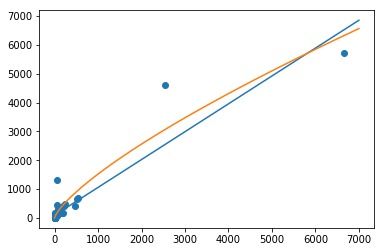

In [138]:
plt.scatter(mammals['body'],mammals['brain'])
X_plot = np.linspace(0,7000,10000)
plt.plot(X_plot, X_plot*regression2.params[1] + regression2.params[0])
plt.plot(X_plot, np.exp(log_lm.params[0])*X_plot**log_lm.params[1])
plt.show()

In [139]:
# Unit Scaling

In [140]:
# Z-Score Scaling

In [141]:
# Polynomial Regression

In [ ]:
# Shrinkage: LASSO